In [13]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

%matplotlib inline

In [2]:
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
data_path = "./mnist_fgsm.pkl"
with open(data_path, "r") as f: 
    data_dict = pickle.load(f) 

noises  = data_dict["noises"]
y_preds = data_dict["y_preds"]
y_preds_adv = data_dict["y_preds_adv"] 

In [9]:
images = []
labels = []
for image, label in test_loader:
    images.extend(image.data.numpy())
    labels.extend(label.data.numpy())

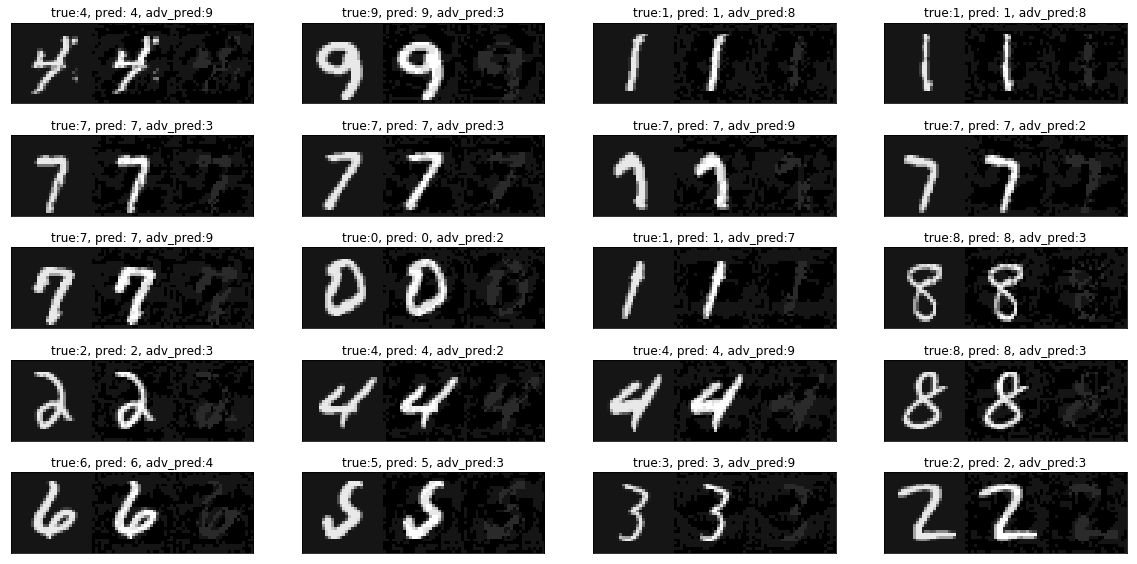

In [28]:
plt.figure(figsize=(20,10))
plt_idx = 0
while plt_idx < 20:
    idx = np.random.choice(range(len(images)), replace=False)
    img = images[idx].squeeze(0)
    noise = noises[idx].reshape(28,28)
    adv_img = img + noise
    if y_preds[idx] != y_preds_adv[idx]:
        disp_im = np.concatenate((img, adv_img, noise), axis=1)
        ax = plt.subplot(5,4,plt_idx+1)
        ax.set_title("true:{}, pred: {}, adv_pred:{}".format(labels[idx], y_preds[idx], y_preds_adv[idx]))
        plt.imshow(disp_im, "gray")
        plt.xticks([])
        plt.yticks([])
        plt_idx += 1
plt.show()